<a href="https://colab.research.google.com/github/CollinsRutto/Social-Media-Analysis-and-scrapping/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install textblob

In [2]:
pip install requests

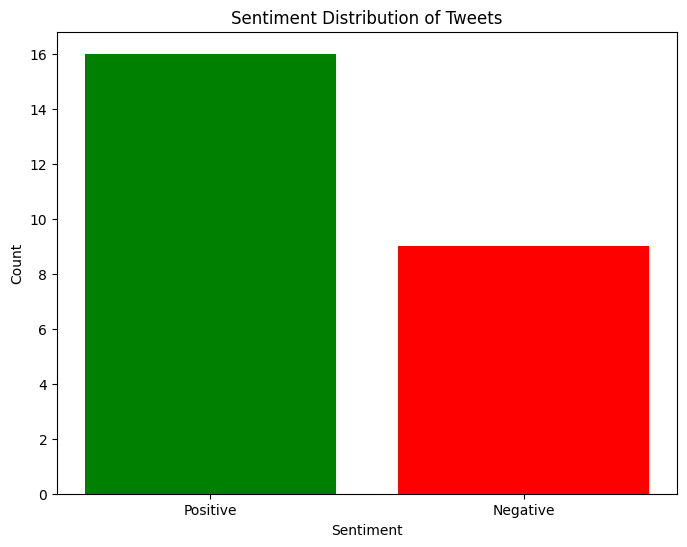

In [3]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import requests
from textblob import TextBlob

# Specify the URL to fetch JSON data
url = "https://api.apify.com/v2/datasets/iVzjFjutm8FKIefpi/items?clean=true&format=json"

try:
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse JSON data from the response
        data = response.json()

        # Extract relevant data
        tweet_texts = [tweet['full_text'] for tweet in data]

        # Perform sentiment analysis
        positive_count = 0
        negative_count = 0

        for text in tweet_texts:
            analysis = TextBlob(text)
            # Determine sentiment polarity (-1 to 1)
            if analysis.sentiment.polarity > 0:
                positive_count += 1
            elif analysis.sentiment.polarity < 0:
                negative_count += 1

        # Visualize sentiment distribution
        labels = ['Positive', 'Negative']
        counts = [positive_count, negative_count]

        plt.figure(figsize=(8, 6))
        plt.bar(labels, counts, color=['green', 'red'])
        plt.title('Sentiment Distribution of Tweets')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.show()

    else:
        # Display an error message if the request was unsuccessful
        print(f"Error: HTTP status code {response.status_code} - {response.reason}")

except Exception as e:
    # Display an error message if any exception occurs
    print(f"Error fetching JSON data from URL: {e}")
